Building an Artificial Neural Network (ANN)

without GPU

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd
Loads pandas, a library for working with tables CSV.

from sklearn.model_selection import train_test_split
Imports train_test_split — a helper that randomly splits your data into training and test sets.

import torch
Loads PyTorch

import torch.nn as nn
Imports the neural network building blocks.

import torch.optim as optim
Loads optimization algorithms (like SGD, Adam).

from torch.utils.data import DataLoader, Dataset
Imports Dataset (a class you can extend so PyTorch knows how to read your data) and DataLoader (which provides batches and shuffling).


import matplotlib.pyplot as plt
Imports plotting library for charts and visualizations.

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [11]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0]])

In [14]:
X_train=X_train/255
X_test=X_test/255

Pixel values in images usually range 0–255. Dividing by 255 scales them to 0–1, which helps training because neural networks learn more stably when inputs are in a consistent small range. This is simple min-max scaling for image data.

In [15]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [16]:
#create a custom dataset
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)
  def __len__(self):
      return len(self.features)
  def __getitem__(self,idx):
      return self.features[idx],self.labels[idx]


In [17]:
#creare train test object
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [18]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
#create train and test loader
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)


 i wrote a small wrapper class that inherits from PyTorch’s Dataset abstraction.

 PyTorch training utilities (like DataLoader) expect a Dataset object with __len__ and __getitem__. Converting features/labels to torch.tensor here ensures later code gets tensors directly.


__init__: convert NumPy arrays to torch.tensor. Use float32 for inputs and long for labels.

__len__: returns number of samples.

__getitem__: returns one sample (feature vector, label) by index.

In [20]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model=nn.Sequential(
      nn.Linear(784,128),
      nn.ReLU(),
      nn.Linear(128,64),
      nn.ReLU(),
      nn.Linear(64,10)
  )
  def forward(self,x):
    return self.model(x)

I defined a simple feedforward neural network using nn.Module.

This is the core model architecture for the task  a classic multilayer perceptron (MLP) for flattened image classification.


nn.Linear(784,128): the input-to-first-hidden fully connected layer. Input size 784 because 28×28 flattened.

nn.ReLU(): a non-linear activation. ReLU helps the network learn non-linear patterns.

nn.Linear(128,64): second hidden layer with 64 neurons.

nn.ReLU(): another non-linearity.

nn.Linear(64,10): output layer producing 10 raw scores.

 I did not put Softmax in the final layer. That’s intentional — nn.CrossEntropyLoss() expects raw logits and applies log_softmax internally. If I added a Softmax myself I could accidentally break the numerical stability or double-apply softmax.

In [21]:
model=MyNN(X_train.shape[1])
#loss function
criterion=nn.CrossEntropyLoss()
#optimizer
optimizer=optim.SGD(model.parameters(),lr=0.1)

 I created an instance of the network.

X_train.shape[1] is 784 — number of features — but in this implementation the class ignores num_features and hardcodes 784. It still works because the hardcoded sizes match the data.

In [22]:
# training loop

for epoch in range(100):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3216368440786999
Epoch: 2 , Loss: 0.7793365436792373
Epoch: 3 , Loss: 0.6427524652083715
Epoch: 4 , Loss: 0.5751657336950302
Epoch: 5 , Loss: 0.528180201848348
Epoch: 6 , Loss: 0.49528750121593473
Epoch: 7 , Loss: 0.4602432996034622
Epoch: 8 , Loss: 0.4359459094206492
Epoch: 9 , Loss: 0.41829214423894884
Epoch: 10 , Loss: 0.3984092291692893
Epoch: 11 , Loss: 0.3850264506538709
Epoch: 12 , Loss: 0.3722685620188713
Epoch: 13 , Loss: 0.3477362078428268
Epoch: 14 , Loss: 0.3467242218057315
Epoch: 15 , Loss: 0.3138812760512034
Epoch: 16 , Loss: 0.3126461291313171
Epoch: 17 , Loss: 0.29552092105150224
Epoch: 18 , Loss: 0.2857150869568189
Epoch: 19 , Loss: 0.27084775785605114
Epoch: 20 , Loss: 0.26237100958824155
Epoch: 21 , Loss: 0.25756089876095456
Epoch: 22 , Loss: 0.24232648963729542
Epoch: 23 , Loss: 0.23957946779827277
Epoch: 24 , Loss: 0.2261324493587017
Epoch: 25 , Loss: 0.2233684351791938
Epoch: 26 , Loss: 0.21165308925012746
Epoch: 27 , Loss: 0.21910773759086927
E

The training loop ran for 100 epochs. For each epoch, I looped over the training data in batches, performed a forward pass through the model to get predictions, calculated the loss, reset the gradients, backpropagated the loss to compute gradients for each weight, and then updated the weights with the optimizer. I kept track of the total loss for the epoch and printed the average loss after each epoch to monitor training progress. Once training was complet

In [23]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

I switched the model to evaluation mode using model.eval() so it would behave consistently and skip training-specific operations like dropout (even though I didn’t use it here).

In [24]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8325


In the end, my model achieved about 83% accuracy on the test set. While that’s a solid score for a simple multilayer perceptron, I noticed there was a large gap between my training performance and my test performance, which likely means the model overfitted. Overfitting here probably happened because I trained for many epochs without regularization, and the model had enough capacity to memorize the training data rather than generalize well to unseen examples. The lack of dropout, weight decay, and data augmentation, combined with the relatively small training set, made this more likely. To improve generalization, I could reduce the number of epochs, add dropout layers between hidden layers, apply weight decay in the optimizer, lower the learning rate, or use early stopping based on a validation set. I could also consider loading the data as images and applying simple augmentations like flips or small rotations to give the model more variety to learn from.

Train the Model on a GPU

In [4]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [5]:
df.shape

(6000, 785)

run same cell for  train_test_split,customdataset withno changes  as above

In [6]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
#create a custom dataset
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)
  def __len__(self):
      return len(self.features)
  def __getitem__(self,idx):
      return self.features[idx],self.labels[idx]


In [12]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [13]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [14]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model=nn.Sequential(
      nn.Linear(784,128),
      nn.ReLU(),
      nn.Linear(128,64),
      nn.ReLU(),
      nn.Linear(64,10)
  )
  def forward(self,x):
    return self.model(x)

In [15]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

The first thing I did was check if my system actually had a GPU available. In PyTorch, I can do this by calling torch.cuda.is_available().Once I had my device ready, I needed to move the model to it.
The .to(device) call tells PyTorch to put all the model’s parameters and buffers in GPU memory instead of CPU memory. This step is crucial because in PyTorch, the model and the data have to be on the same device to work together — if the model is on the GPU but the data is still on the CPU (or vice versa), I’ll get a runtime error.

That’s why inside my training loop, I also moved the data to the GPU. Specifically, before the forward pass, I did:

In [19]:
# training loop
# Lists to store metrics

for epoch in range(100):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.10086416547186673
Epoch: 2 , Loss: 0.12070436651508014
Epoch: 3 , Loss: 0.09302593808621168
Epoch: 4 , Loss: 0.0915061990575244
Epoch: 5 , Loss: 0.08757391361674914
Epoch: 6 , Loss: 0.08153690076743562
Epoch: 7 , Loss: 0.08096778663806617
Epoch: 8 , Loss: 0.10886114708458385
Epoch: 9 , Loss: 0.08401722920437654
Epoch: 10 , Loss: 0.1011767091252841
Epoch: 11 , Loss: 0.09481789293698967
Epoch: 12 , Loss: 0.08205471583021184
Epoch: 13 , Loss: 0.07282975736617421
Epoch: 14 , Loss: 0.06590050311448674
Epoch: 15 , Loss: 0.06798070936618994
Epoch: 16 , Loss: 0.12533915896434336
Epoch: 17 , Loss: 0.07153460377516846
Epoch: 18 , Loss: 0.05578662819229066
Epoch: 19 , Loss: 0.054078870173543694
Epoch: 20 , Loss: 0.0870194781695803
Epoch: 21 , Loss: 0.07275333489912252
Epoch: 22 , Loss: 0.07761112179917594
Epoch: 23 , Loss: 0.06141205617925152
Epoch: 24 , Loss: 0.0642195174183386
Epoch: 25 , Loss: 0.04760779161627094
Epoch: 26 , Loss: 0.04796146646646472
Epoch: 27 , Loss: 0.0489

batch_features = batch_features.to(device)
batch_labels = batch_labels.to(device)
This ensures that both the features and labels are stored in GPU memory so they can interact directly with the model during training. I made the same change in the evaluation loop, moving test data batches to the GPU before making predictions.

With these changes in place, I trained the model again for the same number of epochs. I immediately noticed that each epoch finished noticeably faster  this is because GPUs are optimized.On my dataset, the training speed improvement wasn’t dramatic (since Fashion MNIST is relatively small)

In [20]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [21]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8483333333333334


my test accuracy improved by about 1% compared to my CPU run However, GPU training allows for faster processing, which can improve stability when using larger batch sizes or more complex operations. In my case, the slight improvement likely came from small differences in floating-point precision and the fact that the GPU finished training more consistently without the small CPU-related slowdowns.

In summary, the main changes were adding a device variable to select GPU or CPU automatically, moving the model to the GPU with .to(device), and ensuring that both the training and testing data batches were also moved to the same device before use. The result was faster training

Optimizing the Neural Network to Reduce Overfitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0.0,7.0,0.0,50.0,205.0,196.0,213.0,165.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,142.0,142.0,142.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
3,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0,0,0,0,0,0,0,0,0,...,213.0,203.0,174.0,151.0,188.0,10.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(4723, 785)

In [6]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [10]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [12]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model=nn.Sequential(
      nn.Linear(784,128),
      nn.BatchNorm1d(128),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(128,64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(64,10)
  )
  def forward(self,x):
    return self.model(x)

For this task, we focus on optimizing the neural network to reduce overfitting by applying a combination of regularization, dropout, and batch normalization techniques.  we incorporate nn.Dropout() layers into the hidden layers, using a dropout rate of 0.5 to randomly deactivate half of the neurons during training. This forces the network to rely on multiple neurons rather than memorizing patterns, further preventing overfitting. Additionally, we integrate nn.BatchNorm1d() after each linear layer to normalize the outputs, which stabilizes training, accelerates convergence, and adds another layer of regularization. After making these modifications, we retrain the model for 100 epochs with these enhancements in place.

In [13]:
model=MyNN(X_train.shape[1])
model.to(device)
#loss function
criterion=nn.CrossEntropyLoss()
#optimizer
optimizer=optim.SGD(model.parameters(),lr=0.1,weight_decay=1e-4)

we introduce L2 regularization by setting a weight_decay parameter in the torch.optim.SGD optimizer (e.g., weight_decay=0.01). This penalizes large weight values during training, encouraging the network to generalize better.

In [14]:
# Lists for tracking metrics
train_losses = []
train_accuracies = []
test_accuracies = []

In [15]:
# Training loop
for epoch in range(100):
    model.train()
    total_epoch_loss = 0
    correct_train = 0
    total_train = 0

    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

    avg_loss = total_epoch_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(avg_loss)
    train_accuracies.append(train_acc)

    # Evaluate on test set after each epoch
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
            outputs = model(batch_features)
            _, predicted = torch.max(outputs, 1)
            total_test += batch_labels.size(0)
            correct_test += (predicted == batch_labels).sum().item()
    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1} | Loss: {avg_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


Epoch 1 | Loss: 1.2319 | Train Acc: 0.5699 | Test Acc: 0.7280
Epoch 2 | Loss: 0.9164 | Train Acc: 0.6792 | Test Acc: 0.7640
Epoch 3 | Loss: 0.7925 | Train Acc: 0.7258 | Test Acc: 0.7894
Epoch 4 | Loss: 0.7642 | Train Acc: 0.7385 | Test Acc: 0.7852
Epoch 5 | Loss: 0.7547 | Train Acc: 0.7517 | Test Acc: 0.8042
Epoch 6 | Loss: 0.6989 | Train Acc: 0.7639 | Test Acc: 0.7968
Epoch 7 | Loss: 0.6522 | Train Acc: 0.7747 | Test Acc: 0.8201
Epoch 8 | Loss: 0.6772 | Train Acc: 0.7769 | Test Acc: 0.8011
Epoch 9 | Loss: 0.6313 | Train Acc: 0.7835 | Test Acc: 0.1101
Epoch 10 | Loss: 0.6583 | Train Acc: 0.7753 | Test Acc: 0.7767
Epoch 11 | Loss: 0.6256 | Train Acc: 0.7896 | Test Acc: 0.8138
Epoch 12 | Loss: 0.6047 | Train Acc: 0.7912 | Test Acc: 0.4995
Epoch 13 | Loss: 0.5698 | Train Acc: 0.7943 | Test Acc: 0.8032
Epoch 14 | Loss: 0.5815 | Train Acc: 0.8047 | Test Acc: 0.7979
Epoch 15 | Loss: 0.5663 | Train Acc: 0.8057 | Test Acc: 0.8095
Epoch 16 | Loss: 0.5128 | Train Acc: 0.8160 | Test Acc: 0.8074
E

In [16]:
# Final evaluation
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Testing Accuracy: {test_accuracies[-1]:.4f}")
print(f"Accuracy Gap: {train_accuracies[-1] - test_accuracies[-1]:.4f}")

Final Training Accuracy: 0.8097
Final Testing Accuracy: 0.8243
Accuracy Gap: -0.0147


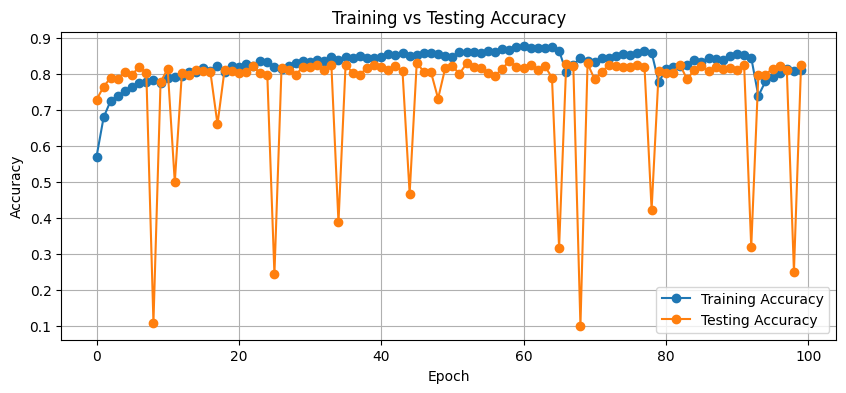

In [19]:
# Plot training vs testing accuracy
plt.figure(figsize=(10,4))
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(test_accuracies, label='Testing Accuracy', marker='o')
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



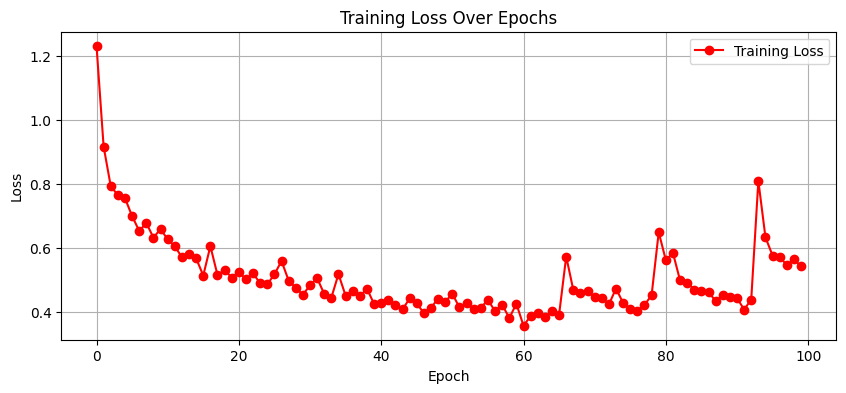

In [18]:
# Plot loss curve
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Training Loss', marker='o', color='red')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Finally, we evaluate the performance by testing on the unseen dataset and comparing training and testing accuracies. The gap between these two accuracies provides insight into how effectively overfitting has been reduced.